Using TensorFlow backend.


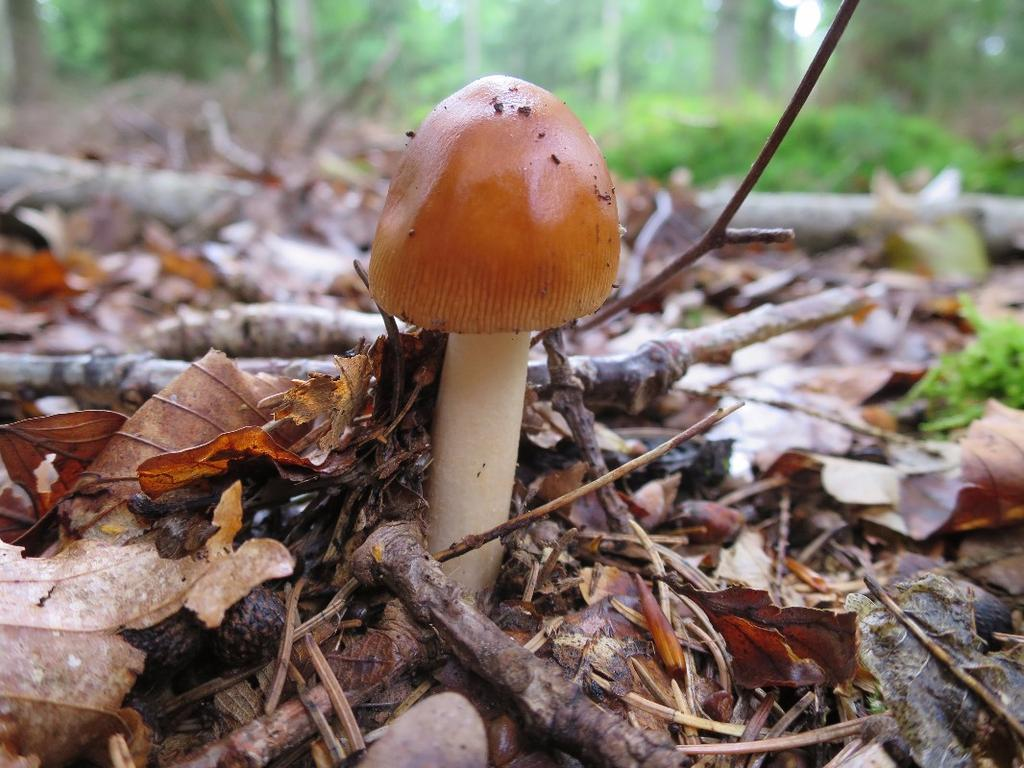

In [1]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

mobile = keras.applications.mobilenet.MobileNet()
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

Image(filename='gombaderp.JPG')

In [2]:
Image(filename='gombaderp2.JPG')
preprocessed_image = prepare_image('gombaderp2.JPG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n07734744', 'mushroom', 0.6587479),
  ('n12998815', 'agaric', 0.13649815),
  ('n13054560', 'bolete', 0.11085733),
  ('n01943899', 'conch', 0.013254424),
  ('n07753592', 'banana', 0.0075993133)]]

In [3]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(86,activation='softmax')(x) #final layer with softmax activation

C:\Users\Cressida\Anaconda3\envs\py36\lib\site-packages\keras_applications\mobilenet.py:208: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [4]:
model=Model(inputs=base_model.input,outputs=preds)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
__________

In [5]:
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [6]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('D:/Fungii',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 17416 images belonging to 86 classes.


In [10]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=300,
                   epochs=10)

Epoch 1/10
300/300 [==============================] - 282s 939ms/step - loss: 2.5829 - acc: 0.3051
Epoch 2/10
300/300 [==============================] - 237s 790ms/step - loss: 2.3536 - acc: 0.3444
Epoch 3/10
300/300 [==============================] - 156s 519ms/step - loss: 2.0719 - acc: 0.4126
Epoch 4/10
300/300 [==============================] - 160s 534ms/step - loss: 1.9525 - acc: 0.4416
Epoch 5/10
300/300 [==============================] - 149s 498ms/step - loss: 1.7999 - acc: 0.4794
Epoch 6/10
300/300 [==============================] - 151s 503ms/step - loss: 1.6389 - acc: 0.5147
Epoch 7/10
300/300 [==============================] - 148s 493ms/step - loss: 1.5447 - acc: 0.5461
Epoch 8/10
300/300 [==============================] - 146s 486ms/step - loss: 1.3737 - acc: 0.5895
Epoch 9/10
300/300 [==============================] - 146s 488ms/step - loss: 1.3578 - acc: 0.6051
Epoch 10/10
300/300 [==============================] - 145s 483ms/step - loss: 1.1374 - acc: 0.6559


In [16]:
import numpy as np
import matplotlib.pyplot as plt
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor
  
img_path = 'C:/Users/Cressida/butyriboletus_appendiculatus.JPG'
new_image = load_image(img_path)

pred = model.predict(new_image)

pred

array([[5.20559205e-08, 5.14527674e-05, 1.43128336e-05, 1.03521556e-08,
        2.14989160e-09, 6.80246671e-07, 2.81732504e-09, 2.98527461e-08,
        1.27547343e-12, 6.15326323e-09, 1.80407983e-06, 3.75195458e-10,
        3.82356785e-11, 3.76625543e-19, 3.64039484e-12, 4.00266056e-13,
        3.22902885e-11, 1.18204767e-07, 5.16727893e-12, 1.68123137e-04,
        2.04921700e-04, 1.01212117e-05, 1.22686913e-02, 1.54270965e-04,
        9.34456621e-05, 9.86491859e-01, 1.51721906e-07, 1.16886305e-08,
        8.87846567e-12, 2.02443564e-15, 6.61309859e-23, 1.18998873e-11,
        4.12998702e-09, 1.44671428e-10, 4.58010646e-07, 5.44529536e-13,
        8.99162038e-13, 2.97293440e-07, 9.21674070e-10, 1.54658784e-12,
        2.63642647e-15, 4.83569984e-08, 3.88702395e-12, 1.13030313e-14,
        1.52796421e-11, 1.83066137e-17, 7.04297376e-09, 7.41994555e-09,
        1.17494225e-09, 4.74172025e-14, 1.01825569e-10, 1.15650226e-15,
        8.51042614e-07, 3.27502971e-06, 5.86207283e-17, 1.154824

In [17]:
model.save('transfer_mobilenet_01.model')